In [1]:
#import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_theme(style="ticks", palette="pastel")

## Loading of dataset

In [2]:
path_default = "./data/stock_data.csv"
stock_data = pd.read_csv(path_default)
stock_data['Date'] = pd.to_datetime(stock_data['Date'], format="%Y-%m-%d")
stock_data

,Date,Open,High,Low,Close,Volume,OpenInt,Stock
0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0,AAPL
1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0,AAPL
2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0,AAPL
3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0,AAPL
4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0,AAPL
...,...,...,...,...,...,...,...,...
19581,2017-11-06,178.56000,180.45000,178.31000,180.17000,13275578,0,FB
19582,2017-11-07,180.50000,180.74800,179.40300,180.25000,12903836,0,FB
19583,2017-11-08,179.79000,180.35000,179.11000,179.56000,10467606,0,FB
19584,2017-11-09,178.31000,179.40000,177.09000,179.30000,12602188,0,FB


In [3]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19586 entries, 0 to 19585
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     19586 non-null  datetime64[ns]
 1   Open     19586 non-null  float64       
 2   High     19586 non-null  float64       
 3   Low      19586 non-null  float64       
 4   Close    19586 non-null  float64       
 5   Volume   19586 non-null  int64         
 6   OpenInt  19586 non-null  int64         
 7   Stock    19586 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 1.2+ MB


In [4]:
stock_data.describe()

,Open,High,Low,Close,Volume,OpenInt
count,19586.000000,19586.000000,19586.000000,19586.000000,1.958600e+04,19586.0
mean,37.408582,37.881571,36.906405,37.406667,8.100395e+07,0.0
std,59.492049,60.287797,58.622548,59.480058,7.982366e+07,0.0
min,0.067200,0.067200,0.067200,0.067200,0.000000e+00,0.0
25%,1.412300,1.440600,1.384100,1.412300,3.385552e+07,0.0
50%,19.649500,19.933000,19.363000,19.640000,6.294731e+07,0.0
75%,38.605000,39.075750,38.229250,38.655500,1.010604e+08,0.0
max,386.690000,389.610000,379.345000,385.000000,2.069770e+09,0.0


In [5]:
companies = stock_data['Stock'].unique()
print(companies)

['AAPL' 'TSLA' 'MSFT' 'FB']


In [6]:
stocks ={}
for i in companies:
  stocks[i] = stock_data[stock_data['Stock'] == i].drop(columns=["Open", "High", "Low","OpenInt", "Stock"])
  print(stocks[i])

           Date      Close    Volume
0    1984-09-07    0.42388  23220030
1    1984-09-10    0.42134  18022532
2    1984-09-11    0.42902  42498199
3    1984-09-12    0.41618  37125801
4    1984-09-13    0.43927  57822062
...         ...        ...       ...
8359 2017-11-06  173.63000  34901241
8360 2017-11-07  174.18000  24424877
8361 2017-11-08  175.61000  24451166
8362 2017-11-09  175.25000  29533086
8363 2017-11-10  174.67000  25130494

[8364 rows x 3 columns]
            Date   Close    Volume
8364  2010-06-28   17.00         0
8365  2010-06-29   23.89  18783276
8366  2010-06-30   23.83  17194394
8367  2010-07-01   21.96   8229863
8368  2010-07-02   19.20   5141807
...          ...     ...       ...
10217 2017-11-06  302.78   6482486
10218 2017-11-07  306.05   5286320
10219 2017-11-08  304.31   4725510
10220 2017-11-09  302.99   5440335
10221 2017-11-10  302.99   4621912

[1858 rows x 3 columns]
            Date     Close      Volume
10222 1986-03-13   0.07533  1371330506
10223 19

## Visualize data of stocks

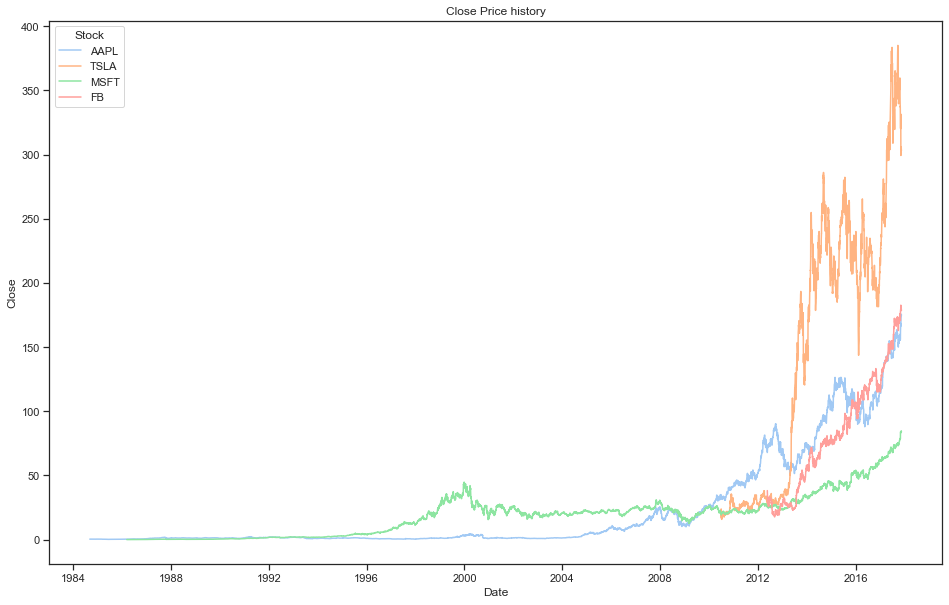

In [7]:
plt.figure(figsize=(16,10))
sns.lineplot(x="Date",y="Close",data=stock_data, hue="Stock")
plt.title("Close Price history")
plt.show()

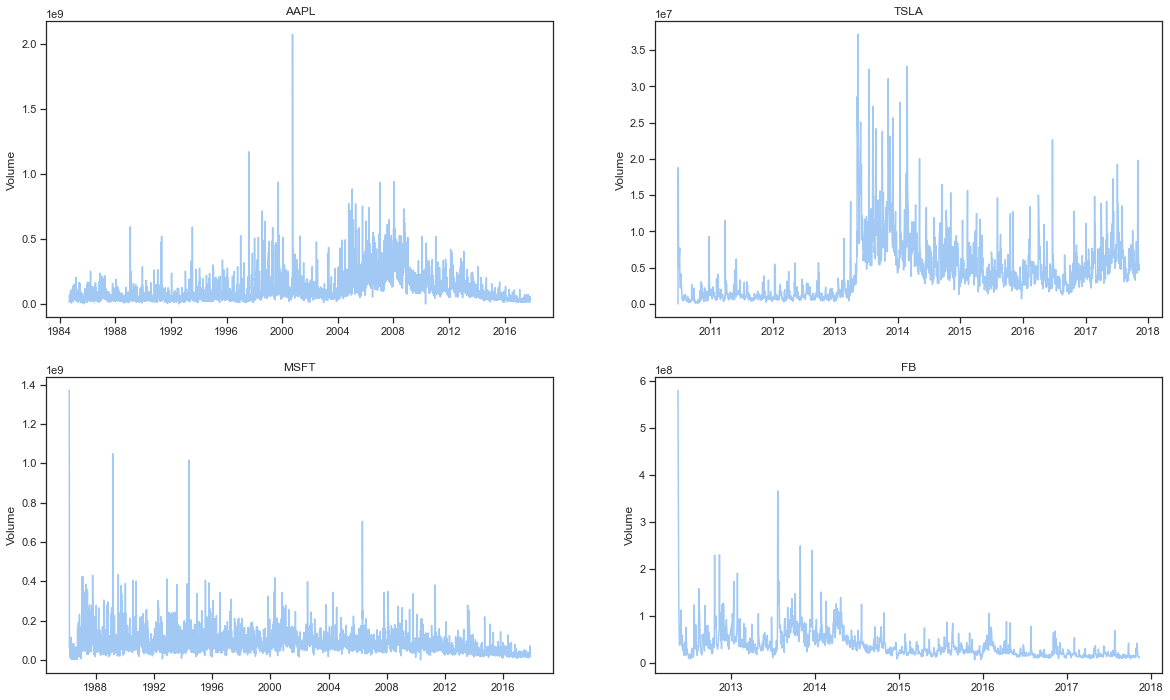

In [8]:
plt.figure(figsize=(20, 12))
for index, key in enumerate(companies):
  plt.subplot(2, 2, index + 1)
  plt.plot(stocks[key]["Date"], stocks[key]["Volume"])
  plt.title(key)
  plt.ylabel('Volume')

## Exploratory Data Analysis

### The moving average of the stocks

In [9]:
moving_average_day = [10, 20, 50]
for period in moving_average_day:
    for company in companies:
        column_name = f'Moving Average for {period} days'
        stocks[company][column_name] = stocks[company]["Close"].rolling(period).mean()

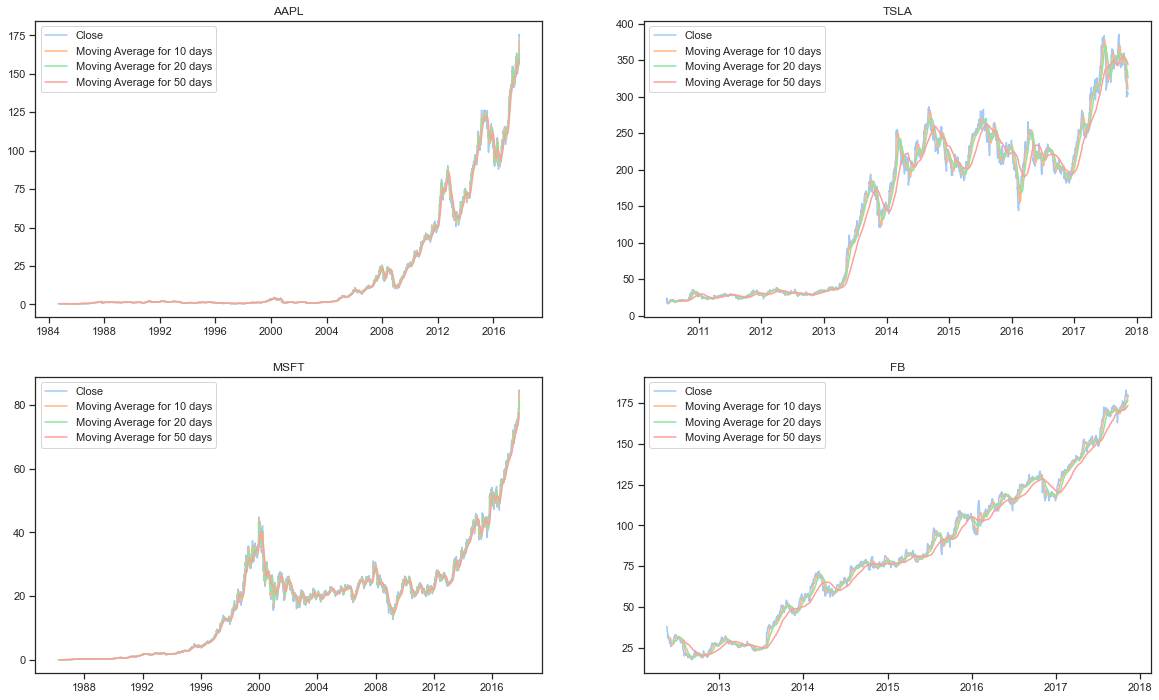

In [10]:
plt.figure(figsize=(20, 12))
for index, key in enumerate(companies):
  plt.subplot(2, 2, index + 1)
  plt.plot(stocks[key]["Date"], stocks[key]["Close"])
  plt.plot(stocks[key]["Date"], stocks[key]["Moving Average for 10 days"])
  plt.plot(stocks[key]["Date"], stocks[key]["Moving Average for 20 days"])
  plt.plot(stocks[key]["Date"], stocks[key]["Moving Average for 50 days"])
  plt.title(key)
  plt.legend(("Close", "Moving Average for 10 days", "Moving Average for 20 days", "Moving Average for 50 days"))

### The daily return of the stock on average

In [11]:
# calculates the percentage change between the current and a prior close's value.
for company in companies:
  stocks[company]["Daily Return"] = stocks[company]["Close"].pct_change()

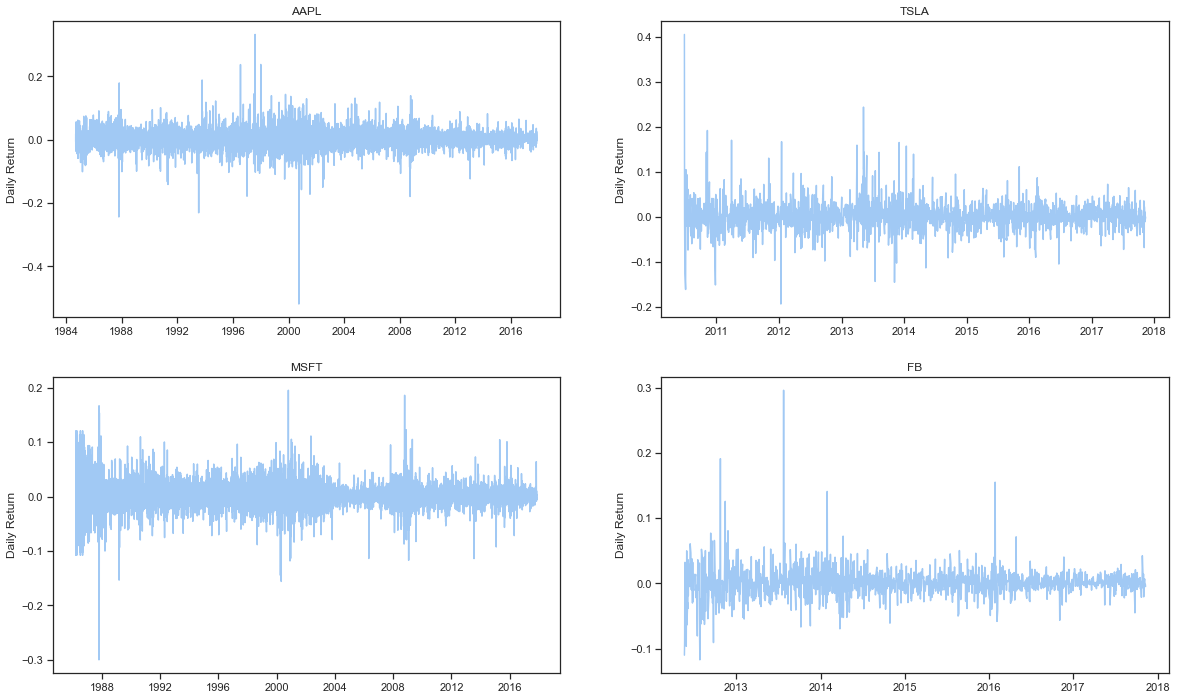

In [12]:
plt.figure(figsize=(20, 12))
for index, key in enumerate(companies):
  plt.subplot(2, 2, index + 1)
  plt.plot(stocks[key]["Date"], stocks[key]["Daily Return"])
  plt.title(key)
  plt.ylabel('Daily Return')

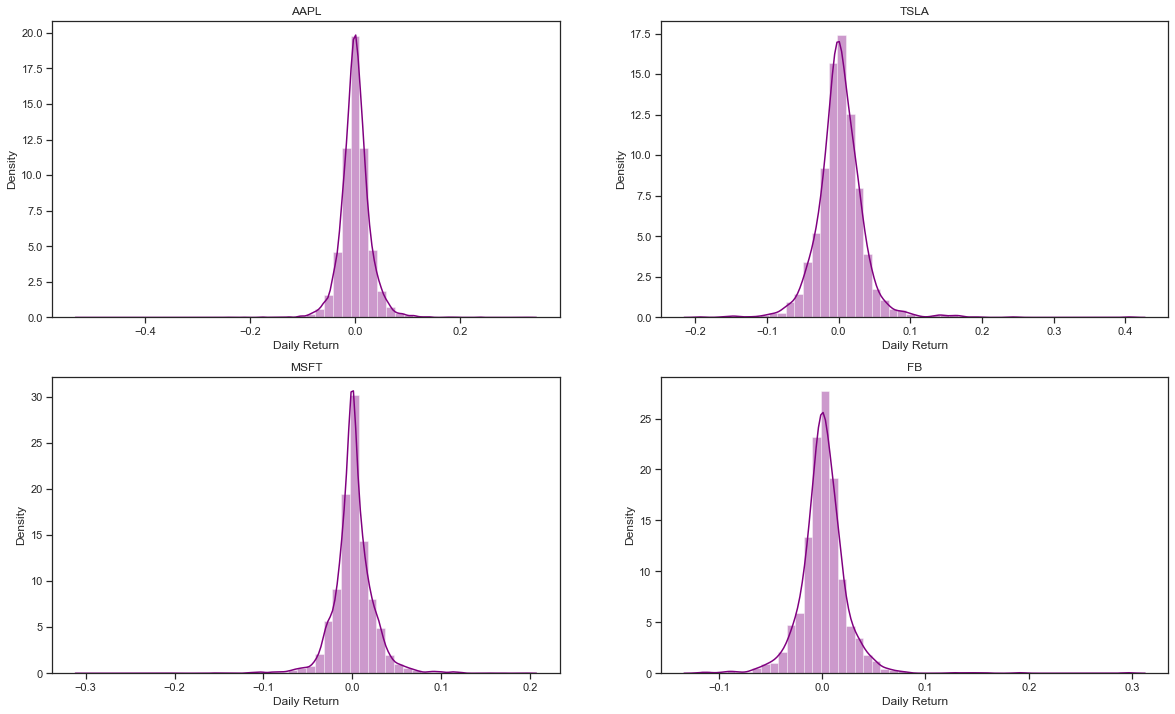

In [13]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(20, 12))
for index, key in enumerate(companies):
  plt.subplot(2, 2, index + 1)
  sns.distplot(stocks[key]["Daily Return"].dropna(), color = "purple")
  plt.title(key)

In [14]:
#Kurtosis is a statistical measure that defines how heavily the tails of a distribution differ from the tails of a normal distribution. In other words kurtosis identifies whether the tails of a given distribution contain extreme values.
print("Kurtosis Value")
for company in companies:
  print(f'{company}: {stocks[company]["Daily Return"].kurtosis()}')

Kurtosis Value
AAPL: 21.16855022028498
TSLA: 16.519892872839673
MSFT: 10.595028298379837
FB: 24.301342049114243


### The correlation between diffrent stocks closing price

In [15]:
FB = stocks['FB'][stocks['FB']['Date']>='2012-05-18']['Close'].values
MSFT = stocks['MSFT'][stocks['MSFT']['Date']>='2012-05-18']['Close'].values
TSLA = stocks['TSLA'][stocks['TSLA']['Date']>='2012-05-18']['Close'].values
AAPL = stocks['AAPL'][stocks['AAPL']['Date']>='2012-05-18']['Close'].values

In [16]:
# Companies_return contain closing price of all the companies
Companies_returns = pd.DataFrame()
Companies_returns["AAPL"] = AAPL
Companies_returns["TSLA"] = TSLA
Companies_returns["MSFT"] = MSFT
Companies_returns["FB"] = FB

Companies_returns

,AAPL,TSLA,MSFT,FB
0,67.922,27.56,25.379,38.23
1,71.880,28.77,25.795,34.03
2,71.326,30.79,25.804,31.00
3,73.066,31.02,25.242,32.00
4,72.393,30.32,25.206,33.03
...,...,...,...,...
1376,173.630,302.78,84.470,180.17
1377,174.180,306.05,84.260,180.25
1378,175.610,304.31,84.560,179.56
1379,175.250,302.99,84.090,179.30


In [17]:
# Companies_Daily_returns contains percentage daily returns of all the companies
Companies_Daily_returns = Companies_returns.pct_change()
Companies_Daily_returns.head()

,AAPL,TSLA,MSFT,FB
0,NaN,NaN,NaN,NaN
1,0.058273,0.043904,0.016392,-0.109861
2,-0.007707,0.070212,0.000349,-0.089039
3,0.024395,0.007470,-0.021780,0.032258
4,-0.009211,-0.022566,-0.001426,0.032188


In [18]:
Companies_Daily_returns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1381 entries, 0 to 1380
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1380 non-null   float64
 1   TSLA    1380 non-null   float64
 2   MSFT    1380 non-null   float64
 3   FB      1380 non-null   float64
dtypes: float64(4)
memory usage: 43.3 KB


<AxesSubplot:>

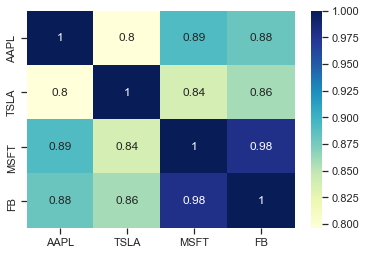

In [19]:
sns.heatmap(Companies_returns.corr(), annot=True, cmap="YlGnBu")

<AxesSubplot:>

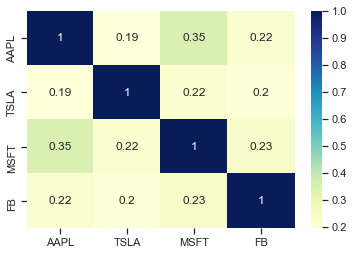

In [20]:
sns.heatmap(Companies_Daily_returns.corr(), annot=True, cmap="YlGnBu")

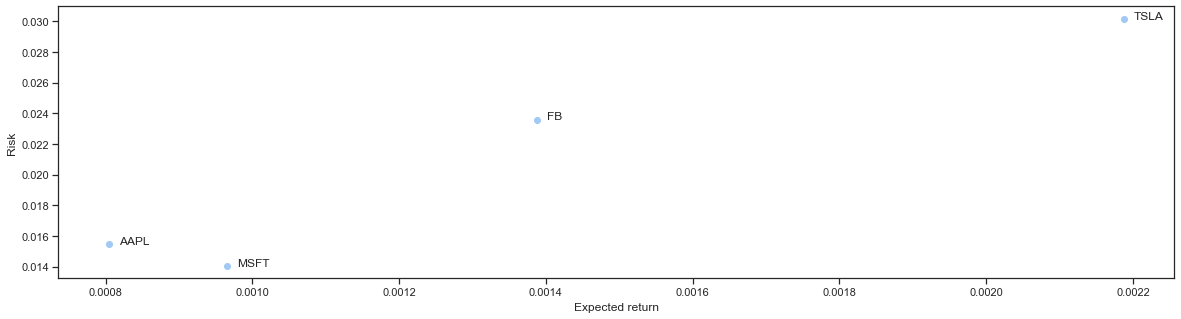

In [21]:
Returns = Companies_Daily_returns.dropna()

plt.figure(figsize=(20, 5))
plt.scatter(Returns.mean(), Returns.std())
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(companies, Returns.mean(), Returns.std()):
    plt.annotate(label, xy = (x, y), xytext = (10, 0), textcoords = 'offset points')